# Task 2: Relationship between wealth, age and funded amount

**Objective: to see if there is any relationship between wealth-age and initial funded amount.**

To reach our objective we will use unsupervised learning because we want to see hiddent pattern and relatinships between data, in order to do that we will use K-Means algorithm, we explained more about in Part 3

File list we will use:
* AccountInvestorSurvey.xlsx (to get wealth, age data)
* InvestorAccountHistory.xlsx (to get initial fund amount)


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

## Part 1: Prepare the data & understand the problem

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# First we will fetch data from account surver, but we won't fetch the all columns
# Because we only interests with age and wealth columns
# We fetch datefunded columns too because later we will use that columnn to fetch initial funded amount from
# InvestorAccountHistory.xlsx file
list = [ "AccountId","Wealth","YearOfBirth"]

df = pd.read_excel("./Project/data/AccountsInvestorSurvey.xlsx", index_col ="AccountId", usecols=list)
df

,Wealth,YearOfBirth
AccountId,,
1,35000.0,1982.0
3,2400000.0,1960.0
4,600000.0,1984.0
5,150000.0,1975.0
7,87500.0,1976.0
...,...,...
7136,30000.0,1974.0
7138,11000.0,1973.0
7139,425000.0,1982.0


In [4]:
# Is there any null value?
df.isnull().sum()

Wealth         2
YearOfBirth    2
dtype: int64

In [5]:
# Drop last two row
df.drop(df.tail(2).index,inplace=True)

In [6]:
df.tail()

,Wealth,YearOfBirth
AccountId,,
7127,600000.0,1957.0
7131,30000.0,1992.0
7136,30000.0,1974.0
7138,11000.0,1973.0
7139,425000.0,1982.0


In [7]:
# We need to convert Year Of Birth column to the age.
df.rename(columns={"YearOfBirth":"Age"}, inplace=True)
# Substract 2020 from age
df["Age"] = 2020 - df["Age"]

In [8]:
df.head()

,Wealth,Age
AccountId,,
1,35000.0,38.0
3,2400000.0,60.0
4,600000.0,36.0
5,150000.0,45.0
7,87500.0,44.0


In [9]:
df.tail()

,Wealth,Age
AccountId,,
7127,600000.0,63.0
7131,30000.0,28.0
7136,30000.0,46.0
7138,11000.0,47.0
7139,425000.0,38.0


In [10]:
# basic statistic
df.describe()

,Wealth,Age
count,6.340000e+02,634.000000
mean,2.013856e+05,46.347003
std,4.241300e+05,11.703665
min,7.500000e+03,22.000000
25%,3.500000e+04,38.000000
50%,7.500000e+04,46.000000
75%,1.500000e+05,54.000000
max,4.000000e+06,89.000000


### DataFrame 2

* In this section we try to get initial fund values for each account

In [11]:
# Let's fetch, initial fund data from InvestorAccountHistory.xlsx
# We will only fetch dateMonth and accountValue to get initial fund
list = ["AccountId","Date","AccountValue"]
df2 = pd.read_excel("./Project/data/InvestorAccountHistory.xlsx", index_col="AccountId",usecols=list)

In [12]:
# Is there any null value?
print(df2.isnull().sum())
df2.tail()

Date            2
AccountValue    2
dtype: int64


,Date,AccountValue
AccountId,,
7138,2019-11-01,5000.0
7139,2019-10-31,5000.0
7139,2019-11-01,5000.0
NaN,NaT,NaN
(191586 rows affected),NaT,NaN


In [13]:
# Drop last 2 row
df2.drop(df2.tail(2).index,inplace=True)

In [14]:
# Sort accountId and dates in ascending order
df2 = df2.reset_index().sort_values(["AccountId","Date"],ascending=True)

In [15]:
df2 = df2.groupby("AccountId").first()

In [16]:
# Drop account id 7123 because it doesn't have data on AccountsInvestorSurvey.xlsx
# So we delete it
df2.drop(7123,inplace=True)

In [17]:
df["InitialFund"] = df2["AccountValue"]

In [18]:
df

,Wealth,Age,InitialFund
AccountId,,,
1,35000.0,38.0,5000.0
3,2400000.0,60.0,10000.0
4,600000.0,36.0,10000.0
5,150000.0,45.0,10000.0
7,87500.0,44.0,10000.0
...,...,...,...
7127,600000.0,63.0,6000.0
7131,30000.0,28.0,1000.0
7136,30000.0,46.0,10000.0


## Part 2: Data Visualization

* Since our data is ready, we can start to visualize it

First take a look at corelation
What is correlation?

Put in plain terms, correlation is a measure of how strongly one variable depends on another. It can be positive or negative. For example salaries and experience year and salariest might be have strong positive correlation. Most of the good machine learning models take it's power from good correlate values

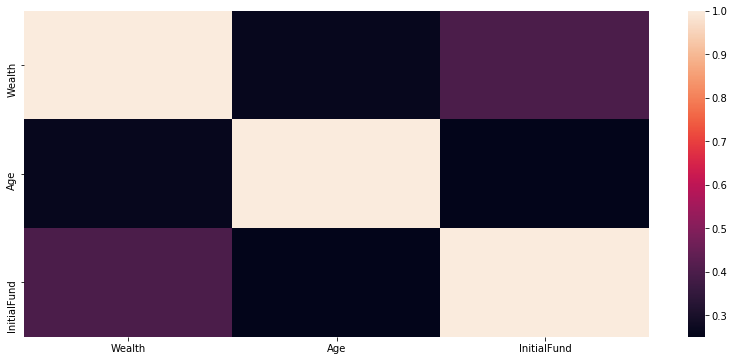

In [19]:
# Correlation between variables
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

We can see that there is a better correlation between wealth and initial fund rather dan wealth and age.
Age has no good correlation with other variables.

### Histogram for Wealth, Age and InitialFund

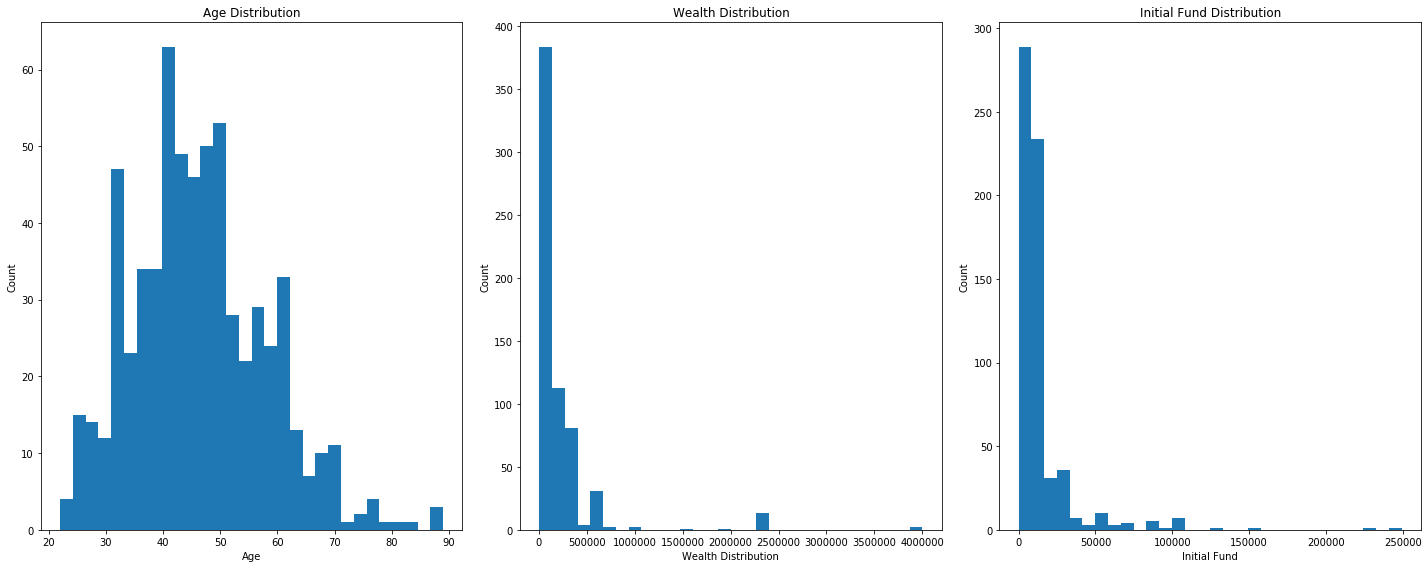

In [20]:
plt.figure(figsize=(20,8))


plt.subplot(1,3,1,)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.hist(df.Age,bins=30)

plt.subplot(1,3,2)
plt.title('Wealth Distribution')
plt.xlabel('Wealth Distribution')
plt.ylabel('Count')
plt.hist(df.Wealth,bins=30)

plt.subplot(1,3,3)
plt.title('Initial Fund Distribution')
plt.xlabel('Initial Fund')
plt.ylabel('Count')
plt.hist(df.InitialFund,bins=30)

plt.tight_layout()

**Histogram Analysis**

Age: Vast majority of investors are distributed between 40-50 years old interval, we have more than 245 investor between 40 and 50 years old.

Wealth: Most of the our investors are distributed between 0-400000 euros wealth, we clearly see that more than 350 of our investors have wealth around 100000 euros.

Initial Fund: Vast majority of our investors start with 10000 euros initial fund, this amount is around 290~

### Density for Wealth, Age and Initial Fund

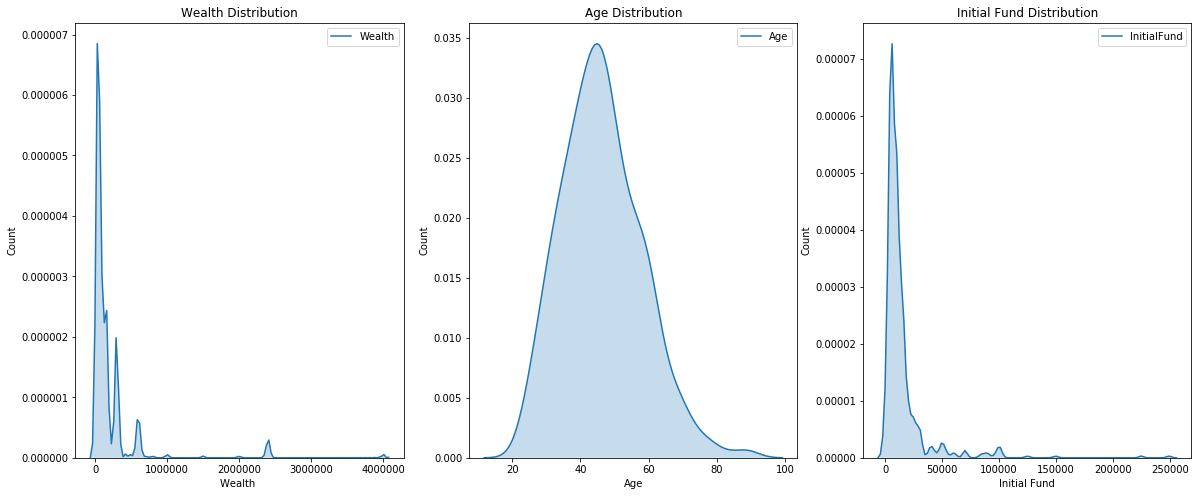

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1,)
plt.title('Wealth Distribution')
plt.xlabel('Wealth ')
plt.ylabel('Count')
sns.kdeplot(data=df.Wealth, shade=True)

plt.subplot(1,3,2,)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
sns.kdeplot(data=df.Age, shade=True)

plt.subplot(1,3,3,)
plt.title('Initial Fund Distribution')
plt.xlabel('Initial Fund')
plt.ylabel('Count')
sns.kdeplot(data=df.InitialFund, shade=True)

We get similiar analysis result like histogram analysis

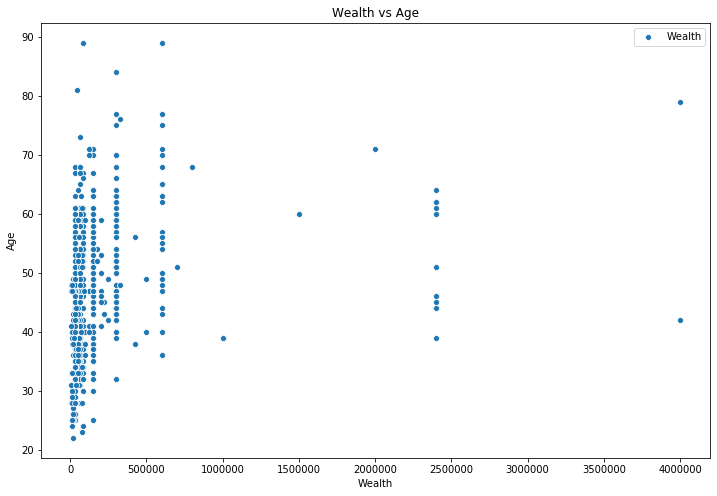

In [22]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=df, x=df.Wealth, y=df.Age, label="Wealth")
plt.xlabel('Wealth'), plt.ylabel('Age') 
plt.title('Wealth vs Age')
plt.legend()
plt.show()

Most of our investors scaled between 0-500000 € wealth

No handles with labels found to put in legend.


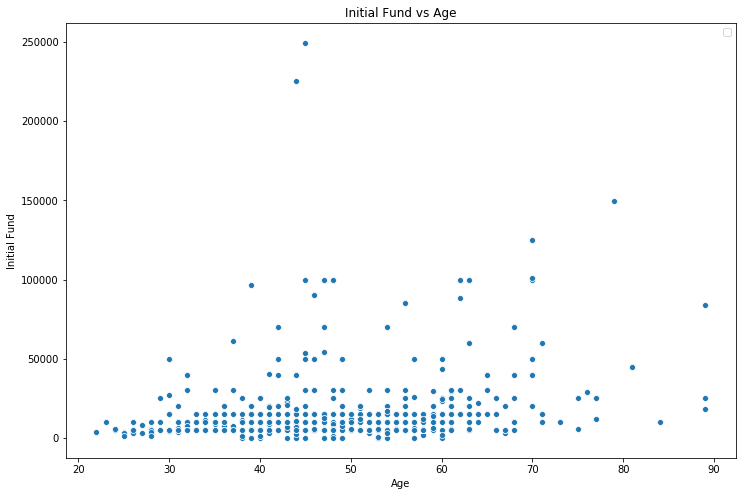

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x=df.Age, y=df.InitialFund)
plt.xlabel('Age'), plt.ylabel('Initial Fund') 
plt.title('Initial Fund vs Age')
plt.legend()
plt.show()

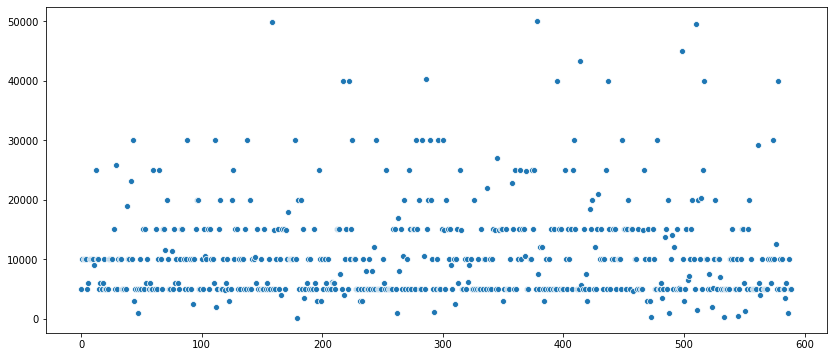

In [24]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df[(df["InitialFund"] < 50000) & (df["InitialFund"] > 0)]["InitialFund"].values)

### Regression plot between Wealth and InitialFund
We remember that there is a good correlation between wealth and inital fund, let's see a regression plot 

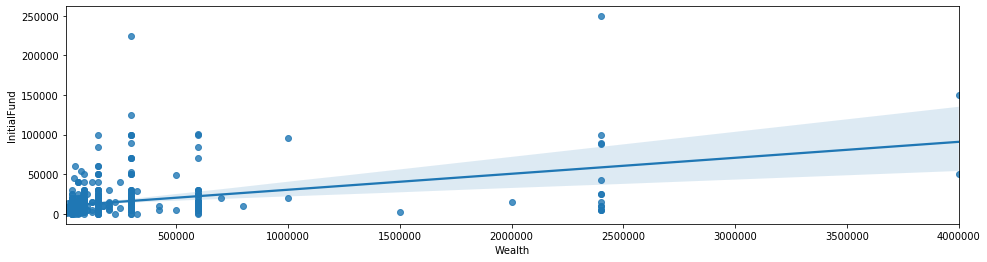

In [25]:
plt.figure(figsize=(16,4))
sns.regplot(x = df.Wealth , y = df.InitialFund , data = df)

Because of most of our investors scaled between 0 and 500000 wealth interval, in our regression plot we see more relationships in that interval

### Regression plot between Wealth and Age

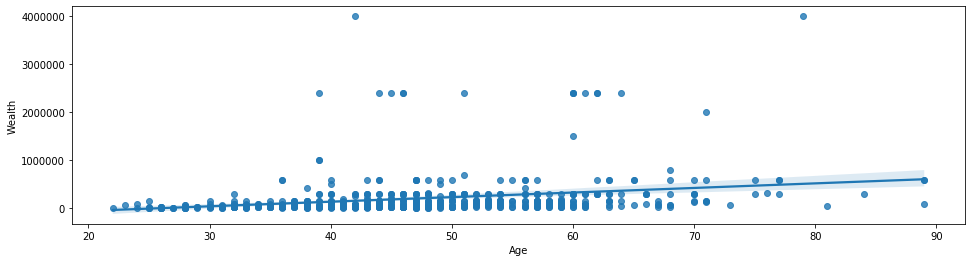

In [43]:
plt.figure(figsize=(16,4))
sns.regplot(x = df.Age , y = df.Wealth , data = df)

## Part 3: K-Means Clustering

Unsupervised Learning:
The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data, just like in our example we're trying to understand underlying structure of features(Wealth, age and Initial fund)


Since we try to see hidden pattern in data and to see relationship between features we will use clustering technique.

**Clustering:** A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior or try to create clusters of similiar features.

In this section
* We will do segmentation using wealth and initial fund
* We will do segmentation using wealth and age
* And eventually we will do segmentation with 3 feature

reference:
https://www.geeksforgeeks.org/clustering-in-machine-learning/

https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/

https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis




## Part 3.1: Segmentation using Wealth and Initial Fund

since we saw a good correlation between wealth and initial fund lets start segmentation with this two feature


**Matrix of Features**

In [26]:
X=df.iloc[:,[0,2]].values

In [27]:
X

array([[  35000.,    5000.],
       [2400000.,   10000.],
       [ 600000.,   10000.],
       ...,
       [  30000.,   10000.],
       [  11000.,    5000.],
       [ 425000.,    5000.]])

### Using Elbow method to find the optiminal cluster number
* K value(How many cluster)? How do we decide to select K value? We will use Elbow Curve technique

**Elbow curve** is the plot of Sum of square distance of the points from the cluster center.As the number of cluster increases the value of WCSS decreases.To find the optimum number of clusters we have to look at the elbow region of the Elbow curve.The cluster number after which there is not much further decrease in WCSS value should be choosen as the optimum number of cluster for a K Means Algorithm.

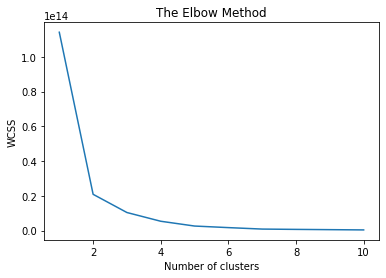

In [28]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Result:

* We've obtained huge square distance from 1 to 2. From 2 to 3 as well.

-> But after 4. Step we can't obtain a really good distance value, therefore our K value selection is 3.

### K-Means Cluster

It's time to fit our model

In [29]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

### Visualization Clusters

<function matplotlib.pyplot.show(*args, **kw)>

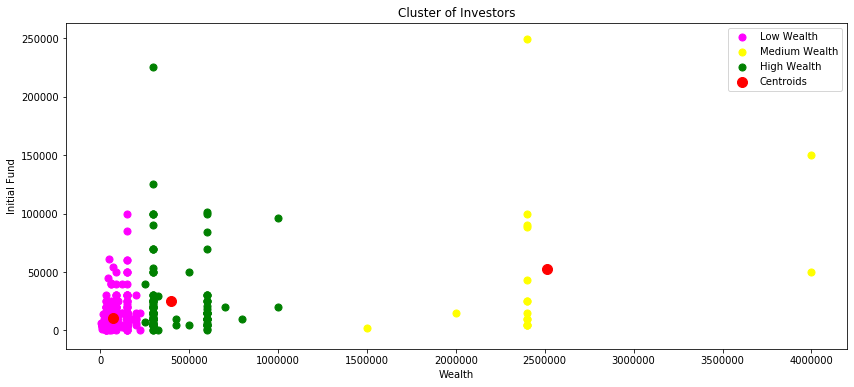

In [30]:
plt.figure(figsize=(14,6))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='magenta',label='Low Wealth')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='yellow',label='Medium Wealth')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='green',label='High Wealth')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.title('Cluster of Investors')
plt.xlabel('Wealth')
plt.ylabel('Initial Fund')
plt.legend()
plt.show

We have three different cluster and we can see their centroid point in plot

According to our algorithm, we've created 3 different cluster.
* Cluster 1 scaled between investors who have wealth between 0 and 200000~
* Cluster 2 scaled between investors who have wealth between 300000~ and 1000000
* Cluster 3 scaled between investors who have wealth between 1500000 and 4000000

## Part 3.2 : Segmentation using Wealth and Age

This time we will build our model using wealth and age

**Matrix of Features**

In [41]:
# Taking wealth and age column
X2 = df.iloc[:,[0,1]].values

**Elbow method to find optimum cluster**

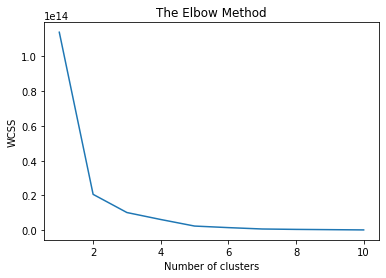

In [32]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* We choose K=3

**Apply K-means**

In [33]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X2)

<function matplotlib.pyplot.show(*args, **kw)>

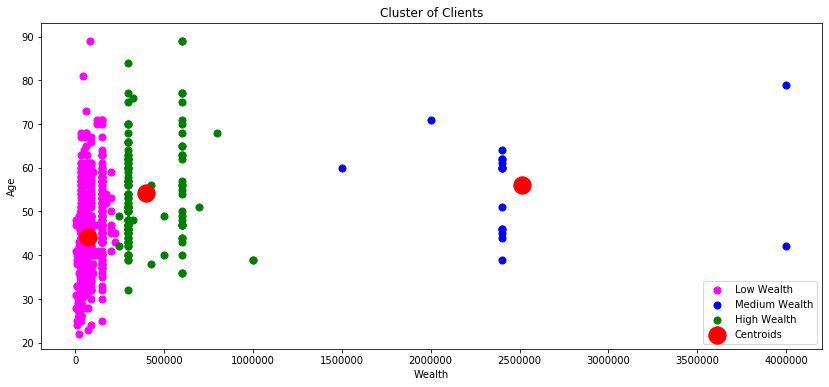

In [34]:
plt.figure(figsize=(14,6))
plt.scatter(X2[y_kmeans==0,0],X2[y_kmeans==0,1],s=50,c='magenta',label='Low Wealth ')
plt.scatter(X2[y_kmeans==1,0],X2[y_kmeans==1,1],s=50,c='blue',label='Medium Wealth')
plt.scatter(X2[y_kmeans==2,0],X2[y_kmeans==2,1],s=50,c='green',label='High Wealth')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Wealth')
plt.ylabel('Age')
plt.legend()
plt.ioff()
plt.show

When we compare our second K-Means model with previous model, our clusters wealth scale is so similiar
We have three different cluster and we can see their centroid point in plot

According to our algorithm, we've created 3 different cluster.
* Cluster 1 scaled between investors who have wealth between 0 and 200000~
* Cluster 2 scaled between investors who have wealth between 300000~ and 1000000
* Cluster 3 scaled between investors who have wealth between 1500000 and 4000000

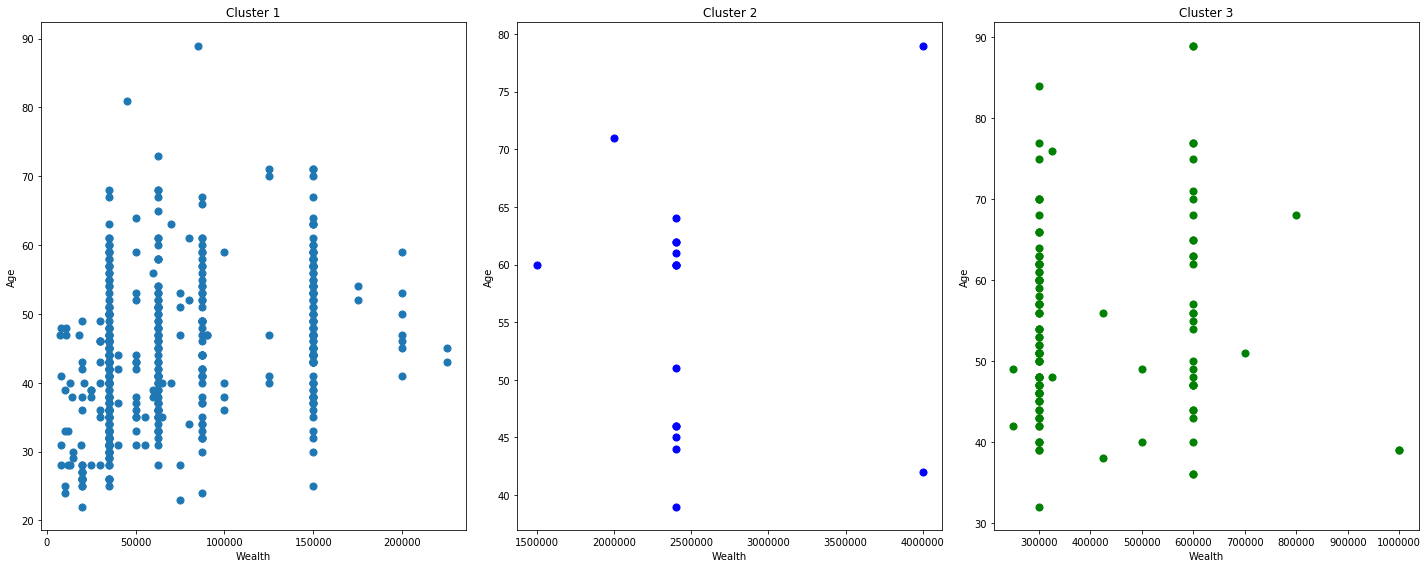

In [35]:
plt.figure(figsize=(20,8))


plt.subplot(1,3,1,)
plt.title('Cluster 1')
plt.ylabel('Age')
plt.xlabel('Wealth')
plt.scatter(X2[y_kmeans==0,0],X2[y_kmeans==0,1],s=50,label='Low Wealth ')

plt.subplot(1,3,2)
plt.title('Cluster 2')
plt.ylabel('Age')
plt.xlabel('Wealth')
plt.scatter(X2[y_kmeans==1,0],X2[y_kmeans==1,1],s=50,c='blue',label='Medium Wealth')

plt.subplot(1,3,3)
plt.title('Cluster 3')
plt.ylabel('Age')
plt.xlabel('Wealth')
plt.scatter(X2[y_kmeans==2,0],X2[y_kmeans==2,1],s=50,c='green',)

plt.tight_layout()

In this scatter plot we see more clearly interval of investors wealth

## Part 3.3: Segmentation with using Wealth, Age and Initial Found

**Matrix of Feature**

In [36]:
X3 = df.iloc[:,[0,1,2]].values

**Elbow method to find optimum cluster**

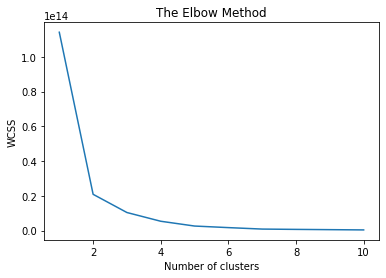

In [37]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* We choose K=3 again

**Apply K-Means**

In [38]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [39]:

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Wealth'],
    y= df['Age'],
    z= df['InitialFund'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Wealth'),
            yaxis = dict(title  = 'Age'),
            zaxis = dict(title  = 'InitialFund')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()


## Results:

After prepare our data,

* With plots, we understood the distribution in our data better
* First to be able to use K-Means clustering algorithm, we choosed optimum cluster, to choose that we've used Elbow method
* After find the optimum cluster, we used our feature to develop a k-means model
* Due to they have better correlation with each other, we started to segmentation with Wealth and Initial Fund and we had 3 different cluster
* After that, we used Wealth and Age for segmentation and we had 3 different cluster again and with scatter plots we saw distribution of clusters better

references:

https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis


https://www.kaggle.com/biphili/customer-centricity-k-means